In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torch.optim import SGD

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/total_comments_labelled.csv')

# Sample and preprocess data
seed_value = 42
non_toxic_comments = df[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['threat'] == 0) & (df['identity_attack'] == 0)].body
toxic_comments = df[df['toxic'] == 1].body

In [ ]:
toxic_comments = toxic_comments.sample(n=12000, random_state=seed_value)
non_toxic_comments = non_toxic_comments.sample(n=12000, random_state=seed_value)

toxic_comments, non_toxic_comments = shuffle(toxic_comments, non_toxic_comments, random_state=seed_value)

In [ ]:
toxic_comments.head()

154802                Wanker doesn't even live in the UK :X
60300     Does a blowjob count? I paid for a really good...
7740      Babe, he is prepping you for him not having to...
188       > Is that the encounter where her dick was big...
10355     If we thought we were perfect, maybe we'd stop...
Name: body, dtype: object

In [ ]:
non_toxic_comments.head()

70922    Do you guys have a car you can use? Or really ...
78827    Maybe I’m just immune to such tactics but I ne...
83690    First who come to mind:  WoW, Witcher 3, Elden...
32235                                     What is ArtRage?
61451       He’s been in good movies. There’s a differencd
Name: body, dtype: object

In [ ]:
toxic_comments = toxic_comments.tolist()
non_toxic_comments = non_toxic_comments.tolist()

non_toxic_labels = [0] * len(non_toxic_comments)
toxic_labels = [1] * len(toxic_comments)

all_comments = non_toxic_comments + toxic_comments
all_labels = non_toxic_labels + toxic_labels

In [ ]:
import re
import nltk

In [ ]:
# Ensure all_comments is a list of strings
all_comments = [str(comment) for comment in all_comments]

In [ ]:
all_comments = [comment.lower() for comment in all_comments]

from nltk.corpus import stopwords
nltk.download('stopwords')

all_comments = [re.sub(r'[^a-zA-Z\s]', '', comment) for comment in all_comments]

stop_words = set(stopwords.words('english'))
all_comments = [' '.join([word for word in comment.split() if word.lower() not in stop_words]) for comment in all_comments]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [ ]:
# Tokenize using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_comments)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, all_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Initialize models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
xgboost_model = XGBClassifier()

In [ ]:
# Train and evaluate each model
models = [logistic_regression_model, random_forest_model, decision_tree_model, xgboost_model]

for model in models:
    print(f"\nTraining and Evaluating {model.__class__.__name__}:")
    train_evaluate_sklearn_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


Training and Evaluating LogisticRegression:

Epoch 1/10:
Training Loss: 0.9993
Validation Accuracy: 0.9948
Test Accuracy: 0.9942
Test Precision: 0.9883
Test Recall: 1.0000
Test F1-Score: 0.9941

Epoch 2/10:
Training Loss: 0.9993
Validation Accuracy: 0.9948
Test Accuracy: 0.9942
Test Precision: 0.9883
Test Recall: 1.0000
Test F1-Score: 0.9941

Epoch 3/10:
Training Loss: 0.9993
Validation Accuracy: 0.9948
Test Accuracy: 0.9942
Test Precision: 0.9883
Test Recall: 1.0000
Test F1-Score: 0.9941

Epoch 4/10:
Training Loss: 0.9993
Validation Accuracy: 0.9948
Test Accuracy: 0.9942
Test Precision: 0.9883
Test Recall: 1.0000
Test F1-Score: 0.9941

Epoch 5/10:
Training Loss: 0.9993
Validation Accuracy: 0.9948
Test Accuracy: 0.9942
Test Precision: 0.9883
Test Recall: 1.0000
Test F1-Score: 0.9941

Epoch 6/10:
Training Loss: 0.9993
Validation Accuracy: 0.9948
Test Accuracy: 0.9942
Test Precision: 0.9883
Test Recall: 1.0000
Test F1-Score: 0.9941

Epoch 7/10:
Training Loss: 0.9993
Validation Accuracy:

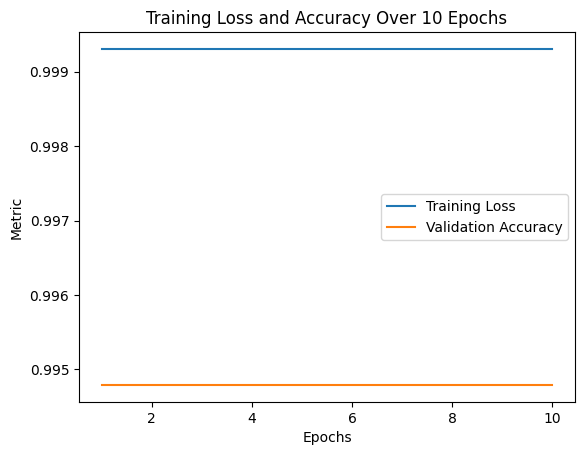


Training and Evaluating RandomForestClassifier:

Epoch 1/10:
Training Loss: 1.0000
Validation Accuracy: 0.9971
Test Accuracy: 0.9975
Test Precision: 0.9954
Test Recall: 0.9996
Test F1-Score: 0.9975

Epoch 2/10:
Training Loss: 1.0000
Validation Accuracy: 0.9962
Test Accuracy: 0.9958
Test Precision: 0.9920
Test Recall: 0.9996
Test F1-Score: 0.9958

Epoch 3/10:
Training Loss: 1.0000
Validation Accuracy: 0.9971
Test Accuracy: 0.9965
Test Precision: 0.9933
Test Recall: 0.9996
Test F1-Score: 0.9964

Epoch 4/10:
Training Loss: 1.0000
Validation Accuracy: 0.9971
Test Accuracy: 0.9965
Test Precision: 0.9933
Test Recall: 0.9996
Test F1-Score: 0.9964

Epoch 5/10:
Training Loss: 1.0000
Validation Accuracy: 0.9962
Test Accuracy: 0.9971
Test Precision: 0.9945
Test Recall: 0.9996
Test F1-Score: 0.9970

Epoch 6/10:
Training Loss: 1.0000
Validation Accuracy: 0.9965
Test Accuracy: 0.9971
Test Precision: 0.9945
Test Recall: 0.9996
Test F1-Score: 0.9970

Epoch 7/10:
Training Loss: 1.0000
Validation Accur

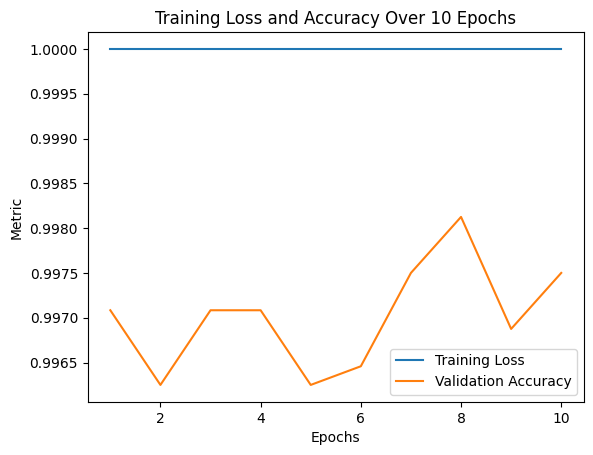


Training and Evaluating DecisionTreeClassifier:

Epoch 1/10:
Training Loss: 1.0000
Validation Accuracy: 0.9881
Test Accuracy: 0.9879
Test Precision: 0.9760
Test Recall: 1.0000
Test F1-Score: 0.9878

Epoch 2/10:
Training Loss: 1.0000
Validation Accuracy: 0.9892
Test Accuracy: 0.9879
Test Precision: 0.9760
Test Recall: 1.0000
Test F1-Score: 0.9878

Epoch 3/10:
Training Loss: 1.0000
Validation Accuracy: 0.9888
Test Accuracy: 0.9877
Test Precision: 0.9756
Test Recall: 1.0000
Test F1-Score: 0.9876

Epoch 4/10:
Training Loss: 1.0000
Validation Accuracy: 0.9885
Test Accuracy: 0.9869
Test Precision: 0.9740
Test Recall: 1.0000
Test F1-Score: 0.9868

Epoch 5/10:
Training Loss: 1.0000
Validation Accuracy: 0.9875
Test Accuracy: 0.9879
Test Precision: 0.9760
Test Recall: 1.0000
Test F1-Score: 0.9878

Epoch 6/10:
Training Loss: 1.0000
Validation Accuracy: 0.9873
Test Accuracy: 0.9865
Test Precision: 0.9732
Test Recall: 1.0000
Test F1-Score: 0.9864

Epoch 7/10:
Training Loss: 1.0000
Validation Accur

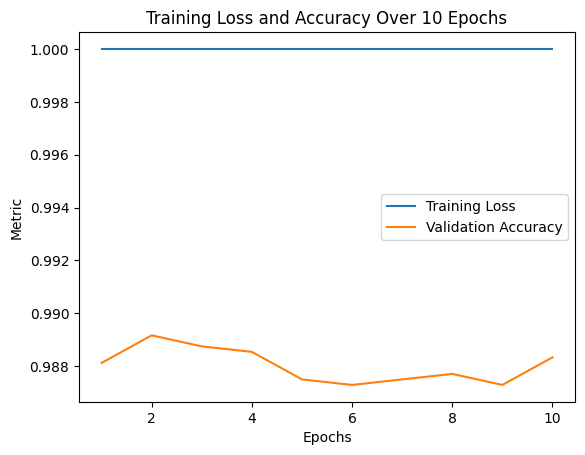


Training and Evaluating XGBClassifier:

Epoch 1/10:
Training Loss: 0.9745
Validation Accuracy: 0.9604
Test Accuracy: 0.9621
Test Precision: 0.9780
Test Recall: 0.9440
Test F1-Score: 0.9607

Epoch 2/10:
Training Loss: 0.9745
Validation Accuracy: 0.9604
Test Accuracy: 0.9621
Test Precision: 0.9780
Test Recall: 0.9440
Test F1-Score: 0.9607

Epoch 3/10:
Training Loss: 0.9745
Validation Accuracy: 0.9604
Test Accuracy: 0.9621
Test Precision: 0.9780
Test Recall: 0.9440
Test F1-Score: 0.9607

Epoch 4/10:
Training Loss: 0.9745
Validation Accuracy: 0.9604
Test Accuracy: 0.9621
Test Precision: 0.9780
Test Recall: 0.9440
Test F1-Score: 0.9607

Epoch 5/10:
Training Loss: 0.9745
Validation Accuracy: 0.9604
Test Accuracy: 0.9621
Test Precision: 0.9780
Test Recall: 0.9440
Test F1-Score: 0.9607

Epoch 6/10:
Training Loss: 0.9745
Validation Accuracy: 0.9604
Test Accuracy: 0.9621
Test Precision: 0.9780
Test Recall: 0.9440
Test F1-Score: 0.9607

Epoch 7/10:
Training Loss: 0.9745
Validation Accuracy: 0.96

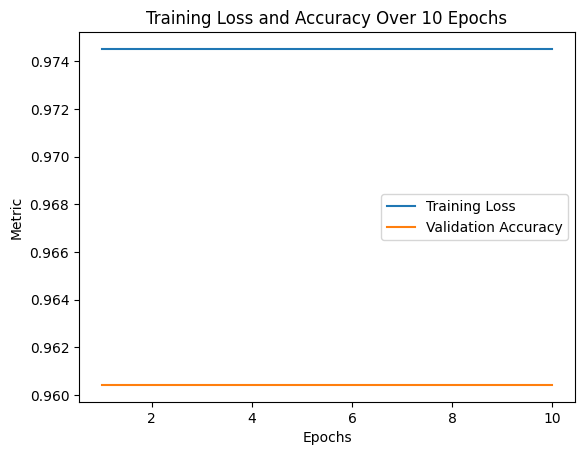

In [ ]:
def train_evaluate_sklearn_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=10):
    train_accuracies = []
    val_accuracies = []
    train_losses = []

    for epoch in range(epochs):
        # Train the model for one epoch
        model.fit(X_train, y_train)

        # Predictions on training set
        train_predictions = model.predict(X_train)
        train_loss = accuracy_score(y_train, train_predictions)
        train_losses.append(train_loss)

        # Predictions on validation set
        val_predictions = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_predictions)
        val_accuracies.append(val_accuracy)

        # Predictions on test set
        test_predictions = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)

        # Compute precision, recall, f1-score for test set
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

        # Display results for each epoch
        print(f"\nEpoch {epoch + 1}/{epochs}:")
        print(f"Training Loss: {train_loss:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Precision: {precision:.4f}")
        print(f"Test Recall: {recall:.4f}")
        print(f"Test F1-Score: {f1_score:.4f}")

    # Plot accuracy and training loss over epochs
    epoch_numbers = np.arange(1, epochs + 1)
    plt.plot(epoch_numbers, train_losses, label='Training Loss')
    plt.plot(epoch_numbers, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Metric')
    plt.title(f'Training Loss and Accuracy Over {epochs} Epochs')
    plt.legend()
    plt.show()

# Tokenize using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_comments)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, all_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
xgboost_model = XGBClassifier()

# Train and evaluate each model with accuracy and training loss over epochs
models = [logistic_regression_model, random_forest_model, decision_tree_model, xgboost_model]

for model in models:
    print(f"\nTraining and Evaluating {model.__class__.__name__}:")
    train_evaluate_sklearn_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=10)


# **DistillBERT Tokenization and Training**

In [ ]:
# Tokenize and create PyTorch dataset
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

encodings = tokenizer(all_comments, truncation=True, padding=True, max_length=128, return_tensors='pt')
dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(all_labels))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Split the dataset into training, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

In [ ]:
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

In [ ]:
# Set up DataLoader for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# Load the DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model = model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# Training loop
num_epochs = 3
training_loss = []  # Initialize an empty list to store training loss over epochs

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    total_loss = 0.0

    with tqdm(train_loader, desc=f"Epoch {epoch + 1}", unit="batch") as t:
        for i, batch in enumerate(t):
            input_ids, attention_mask, labels = batch

            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()

            optimizer.step()

            t.set_postfix(loss=loss.item())
            total_loss += loss.item()

        end_time = time.time()
        elapsed_time = end_time - start_time
        average_loss = total_loss / len(train_loader)
        training_loss.append(average_loss)  # Store training loss for this epoch

        print(f"Epoch {epoch + 1}, Average Loss: {average_loss}, Training Time: {elapsed_time} seconds")

Epoch 1: 100%|██████████| 2400/2400 [03:47<00:00, 10.56batch/s, loss=0.0119]


Epoch 1, Average Loss: 0.1181304021376612, Training Time: 227.23306107521057 seconds


Epoch 2: 100%|██████████| 2400/2400 [03:47<00:00, 10.53batch/s, loss=0.000601]


Epoch 2, Average Loss: 0.017188734185316815, Training Time: 227.92807507514954 seconds


Epoch 3: 100%|██████████| 2400/2400 [03:47<00:00, 10.54batch/s, loss=0.0311]

Epoch 3, Average Loss: 0.012210514972527259, Training Time: 227.77640843391418 seconds


In [ ]:
print(training_loss)

[0.1181304021376612, 0.017188734185316815, 0.012210514972527259]


In [ ]:
# Save the fine-tuned model
# model.save_pretrained('/content/drive/MyDrive/bert-fine-tuned1')

In [ ]:
# Testing fine-tuned BERT loop
model.eval()
correct_predictions = 0
total_examples = 0

with torch.no_grad():
    for input_ids, attention_mask, labels in tqdm(test_loader, desc="Testing", unit="batch"):
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        _, predicted = torch.max(probabilities, 1)

        correct_predictions += (predicted == labels).sum().item()
        total_examples += labels.size(0)

test_accuracy = correct_predictions / total_examples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Testing: 100%|██████████| 300/300 [00:08<00:00, 35.37batch/s]

Test Accuracy: 98.96%


In [ ]:
%matplotlib inline

In [ ]:
# Validation loop
model.eval()
true_labels = []
predicted_labels = []
correct_predictions = 0
total_examples = 0

with torch.no_grad():
    for input_ids, attention_mask, labels in tqdm(val_loader, desc="Validation", unit="batch"):
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        _, predicted = torch.max(probabilities, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

        correct_predictions += (predicted == labels).sum().item()
        total_examples += labels.size(0)

validation_accuracy = correct_predictions / total_examples
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

Validation: 100%|██████████| 300/300 [00:08<00:00, 35.31batch/s]

Validation Accuracy: 98.83%


In [ ]:
# Calculate Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')

In [ ]:
print("num_epochs:", num_epochs)
print("training_loss:", training_loss)
print("test_accuracy:", test_accuracy)
print("recall:", recall)

num_epochs: 3
training_loss: [0.1181304021376612, 0.017188734185316815, 0.012210514972527259]
test_accuracy: 0.9895833333333334
recall: 1.0


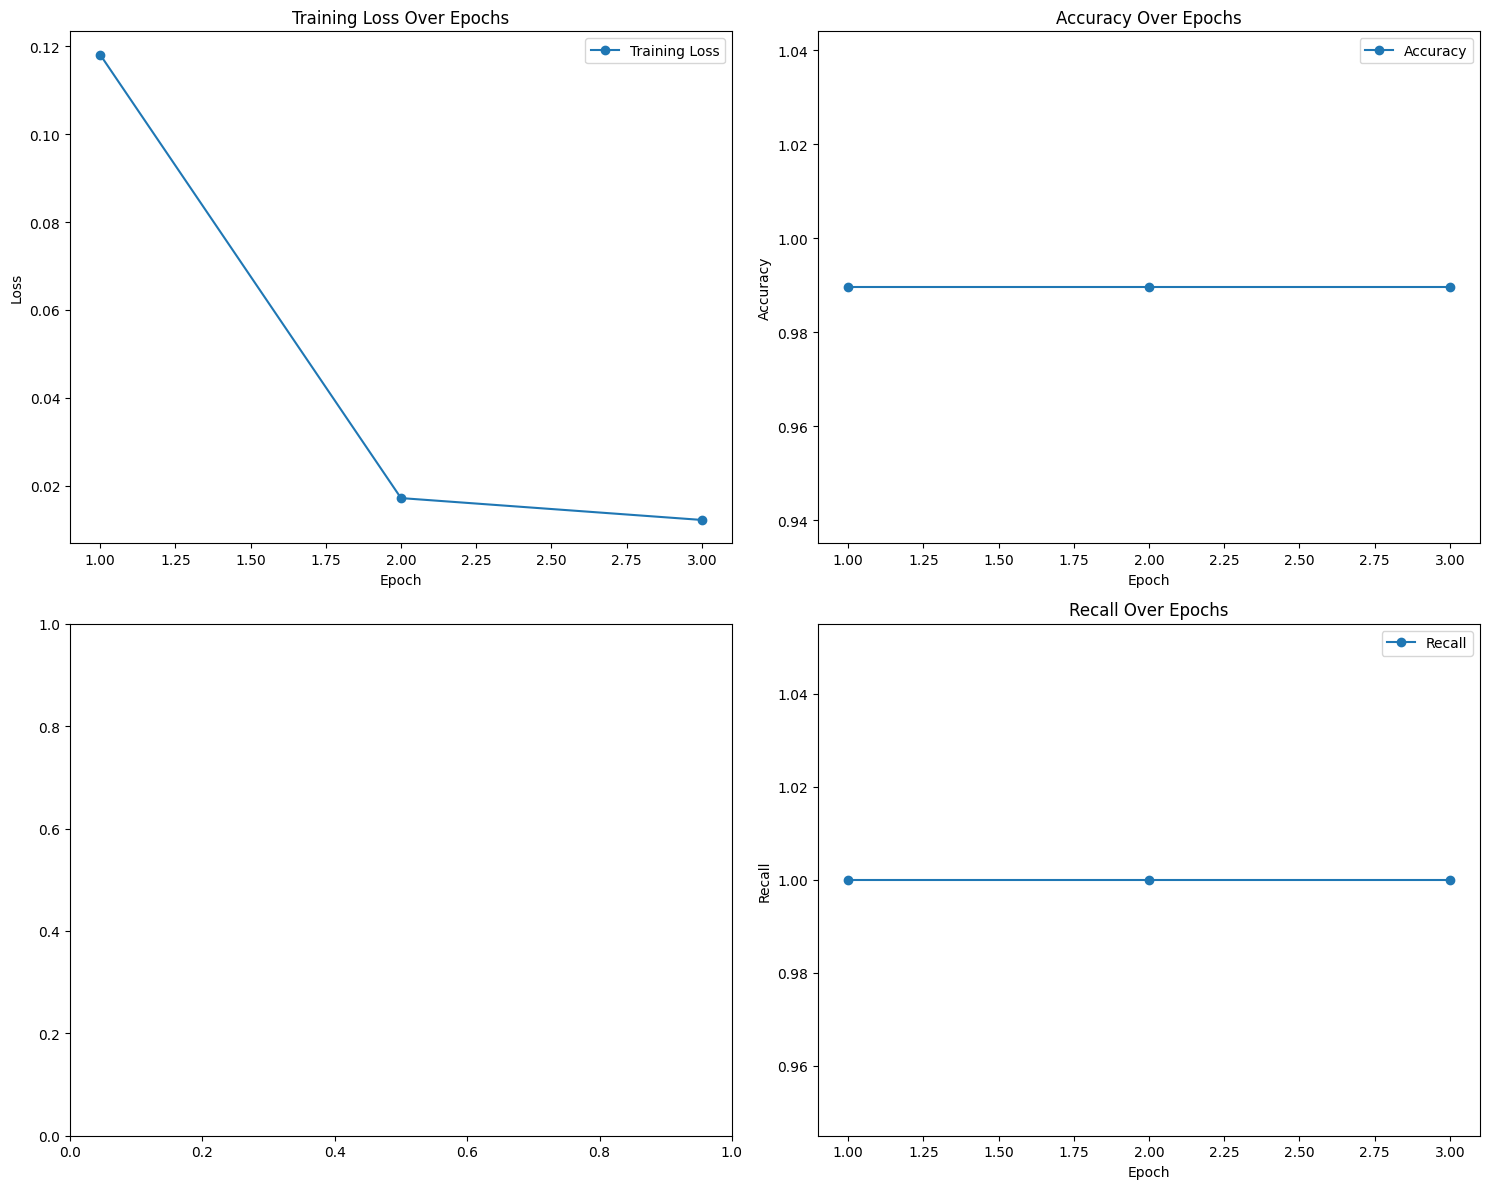

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot a simple curve for training loss
axes[0, 0].plot(range(1, num_epochs + 1), training_loss, label='Training Loss', marker='o')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training Loss Over Epochs')
axes[0, 0].legend()

# Plot a horizontal line for test accuracy
axes[0, 1].plot(range(1, num_epochs + 1), [test_accuracy]*num_epochs, label='Accuracy', marker='o')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Accuracy Over Epochs')
axes[0, 1].legend()

# Plot a horizontal line for recall
axes[1, 1].plot(range(1, num_epochs + 1), [recall]*num_epochs, label='Recall', marker='o')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Recall Over Epochs')
axes[1, 1].legend()

# Explicitly show the plots
plt.tight_layout()
plt.show()

In [ ]:
print("Recall values:", [recall]*num_epochs)

Recall values: [1.0, 1.0, 1.0]


In [ ]:
print("Training Loss:", training_loss)
print("Test Accuracy:", test_accuracy)
print("Recall:", recall)

Training Loss: [0.1181304021376612, 0.017188734185316815, 0.012210514972527259]
Test Accuracy: 0.9895833333333334
Recall: 1.0


In [ ]:
print("Precision:", precision)
print("F1 Score:", f1)

Precision: 0.9771615008156607
F1 Score: 0.9884488448844885


# **Testing on entirely new dataset**

In [ ]:
new_data_df = pd.read_csv('/content/drive/MyDrive/new_commments_output.csv')  # Provide the path to your new CSV file


non_toxic_comments_test = new_data_df[(new_data_df['toxic'] == 0) & (new_data_df['severe_toxic'] == 0) & (new_data_df['threat'] == 0) & (new_data_df['identity_attack'] == 0)].body
toxic_comments_test = new_data_df[new_data_df['toxic'] == 1].body

In [ ]:
toxic_comments_test = toxic_comments_test.sample(n=1200, random_state=42)
non_toxic_comments_test = non_toxic_comments_test.sample(n=1200, random_state=42)

toxic_comments_test, non_toxic_comments_test = shuffle(toxic_comments_test, non_toxic_comments_test, random_state=42)

toxic_comments_test = toxic_comments_test.tolist()
non_toxic_comments_test = non_toxic_comments_test.tolist()

In [ ]:
non_toxic_labels_test = [0] * len(non_toxic_comments_test)
toxic_labels_test = [1] * len(toxic_comments_test)

new_comments = non_toxic_comments_test + toxic_comments_test
true_labels_test = non_toxic_labels_test + toxic_labels_test

# Testing Traditional Models with New Data

In [ ]:
# Ensure new_comments is a list of strings
new_comments = [str(comment) for comment in new_comments]

new_comments = [comment.lower() for comment in new_comments]

In [ ]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))
new_comments = [' '.join([word for word in comment.split() if word.lower() not in stop_words]) for comment in new_comments]

In [ ]:
# import re

new_comments = [re.sub(r'[^a-zA-Z\s]', '', comment) for comment in new_comments]


Testing LogisticRegression:
Test Precision: 0.9599
Test Recall: 0.5592
Test F1-Score: 0.7067
Test Accuracy: 0.7679
Test ROC AUC: 0.8591


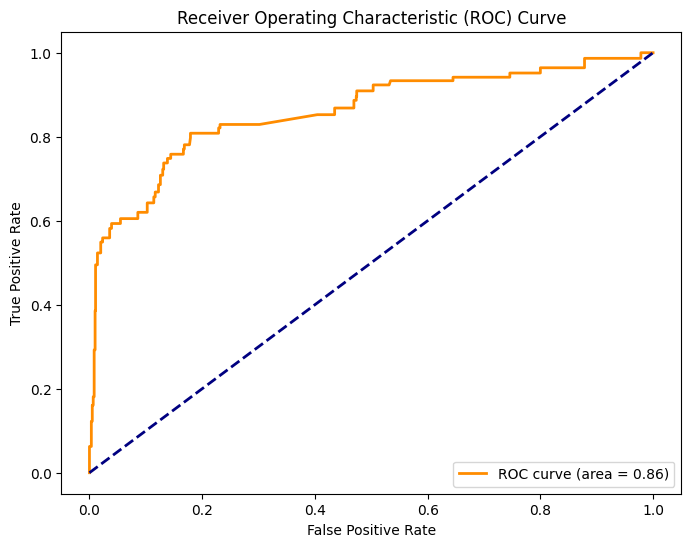


Testing RandomForestClassifier:
Test Precision: 0.9849
Test Recall: 0.5450
Test F1-Score: 0.7017
Test Accuracy: 0.7683
Test ROC AUC: 0.8487


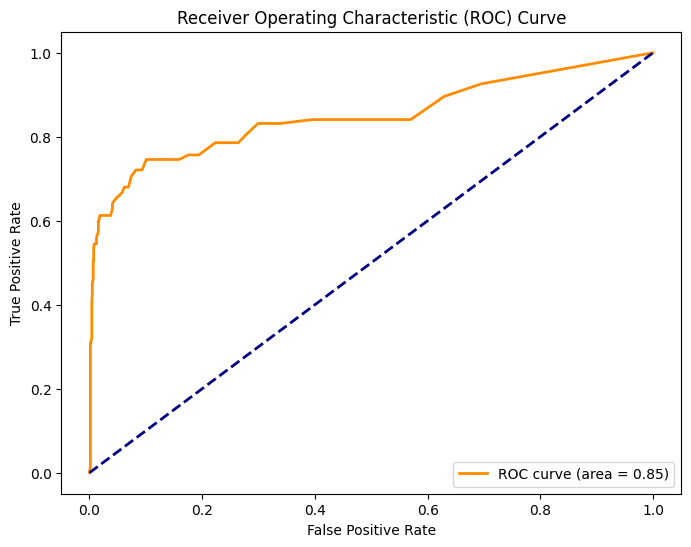


Testing DecisionTreeClassifier:
Test Precision: 0.9078
Test Recall: 0.6483
Test F1-Score: 0.7564
Test Accuracy: 0.7913
Test ROC AUC: 0.7913


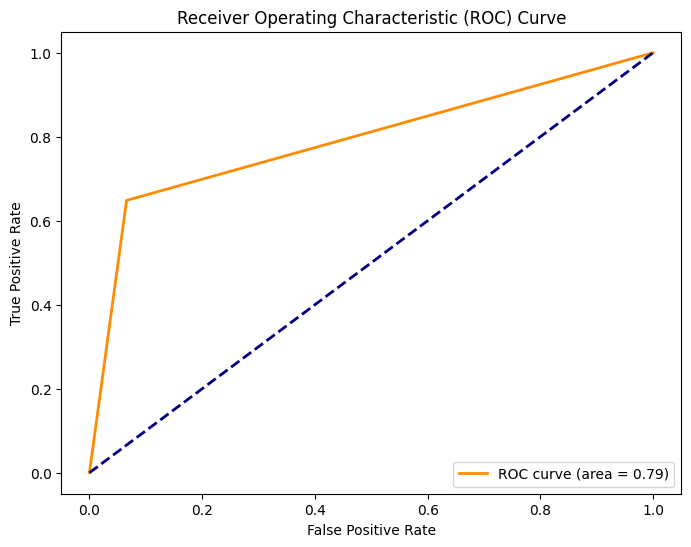


Testing XGBClassifier:
Test Precision: 0.9629
Test Recall: 0.6050
Test F1-Score: 0.7431
Test Accuracy: 0.7908
Test ROC AUC: 0.8477


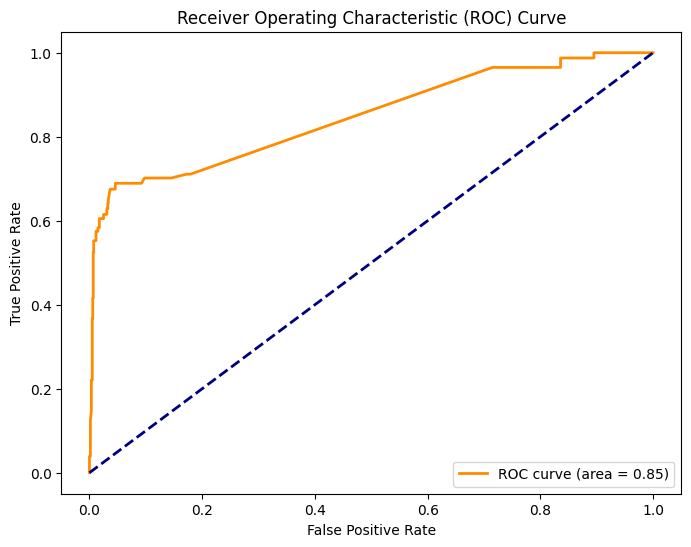

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

def test_sklearn_model(model, X_test, true_labels):
    # Predictions on test set
    test_predictions = model.predict(X_test)

    # Compute precision, recall, f1-score, and accuracy
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, test_predictions, average='binary')
    accuracy = accuracy_score(true_labels, test_predictions)

    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, thresholds = roc_curve(true_labels, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Print evaluation metrics
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1-Score: {f1_score:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Tokenize new comments using the same CountVectorizer instance
new_X = vectorizer.transform(new_comments)

# Test each model on the new comments
for model in models:
    print(f"\nTesting {model.__class__.__name__}:")
    test_sklearn_model(model, new_X, true_labels_test)


# Testing Distill-BERT with new data

In [ ]:
# Load the saved model
loaded_model = DistilBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/bert-fine-tuned1')

In [ ]:
# Assuming loaded_model is already on the correct device (GPU)

loaded_model.to(device)

# Move input tensors to the same device as the model

# input_ids = input_ids.to(device)
# attention_mask = attention_mask.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
encodings = tokenizer(new_comments, truncation=True, padding=True, max_length=128, return_tensors='pt')

# Create PyTorch dataset
new_dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'])

# Set up DataLoader
new_loader = DataLoader(new_dataset, batch_size=8, shuffle=False)

loaded_model.eval()
predicted_labels = []

with torch.no_grad():
    for input_ids, attention_mask in new_loader:
        # Move tensors to the GPU
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = loaded_model(input_ids, attention_mask=attention_mask)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        _, predicted = torch.max(probabilities, 1)

        predicted_labels.extend(predicted.cpu().numpy())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy_test = accuracy_score(true_labels_test, predicted_labels)
print(f'Test Accuracy on New Data: {accuracy_test * 100:.2f}%')

# Calculate Precision
precision_test = precision_score(true_labels_test, predicted_labels)

# Calculate Recall
recall_test = recall_score(true_labels_test, predicted_labels)

# Calculate F1 Score
f1_test = f1_score(true_labels_test, predicted_labels)

# Confusion Matrix
conf_matrix_test = confusion_matrix(true_labels_test, predicted_labels)
print('\nConfusion Matrix on New Data:')
print(conf_matrix_test)

# Print the results
print(f'Precision on New Data: {precision_test:.4f}')
print(f'Recall on New Data: {recall_test:.4f}')
print(f'F1 Score on New Data: {f1_test:.4f}')

Test Accuracy on New Data: 86.79%

Confusion Matrix on New Data:
[[1163   37]
 [ 280  920]]
Precision on New Data: 0.9613
Recall on New Data: 0.7667
F1 Score on New Data: 0.8530


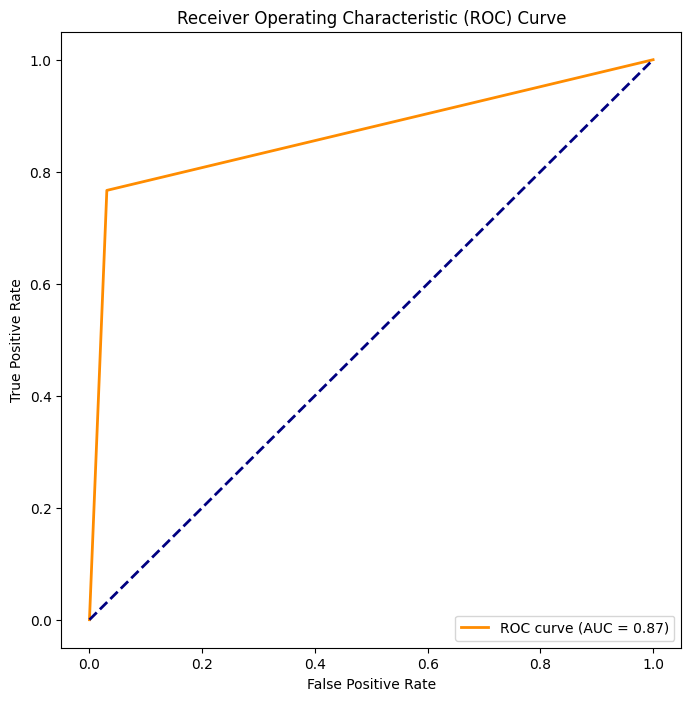

AUC-ROC: 0.8679166666666667


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_scores) for the positive class
fpr, tpr, thresholds = roc_curve(true_labels_test, predicted_labels)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC-ROC:', roc_auc)